In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# View the first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
# Drop rows with missing 'new_cases' or 'total_cases' as an example
df_clean = df.dropna(subset=["new_cases", "total_cases"])


In [3]:
# Basic statistics
print(df_clean.describe())

# Group by country (location) and calculate average new cases
grouped = df_clean.groupby("location")["new_cases"].mean().sort_values(ascending=False)
print(grouped.head(10))


        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.101590e+05  4.101590e+05        4.089290e+05  4.101590e+05   
mean   7.195224e+06  8.017360e+03        8.041026e+03  7.988519e+04   
std    4.473250e+07  2.296649e+05        8.661611e+04  4.406246e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.246000e+03  0.000000e+00        0.000000e+00  4.200000e+01   
50%    6.279100e+04  0.000000e+00        1.200000e+01  7.780000e+02   
75%    7.294750e+05  0.000000e+00        3.132860e+02  9.366000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410147.000000        408917.000000            410159.000000   
mean       71.761829            71.980526            110908.945571   
std      1369.002310           513.911313            161254.406639   
min         0.000000             0.000000                 0.000000   
25%       

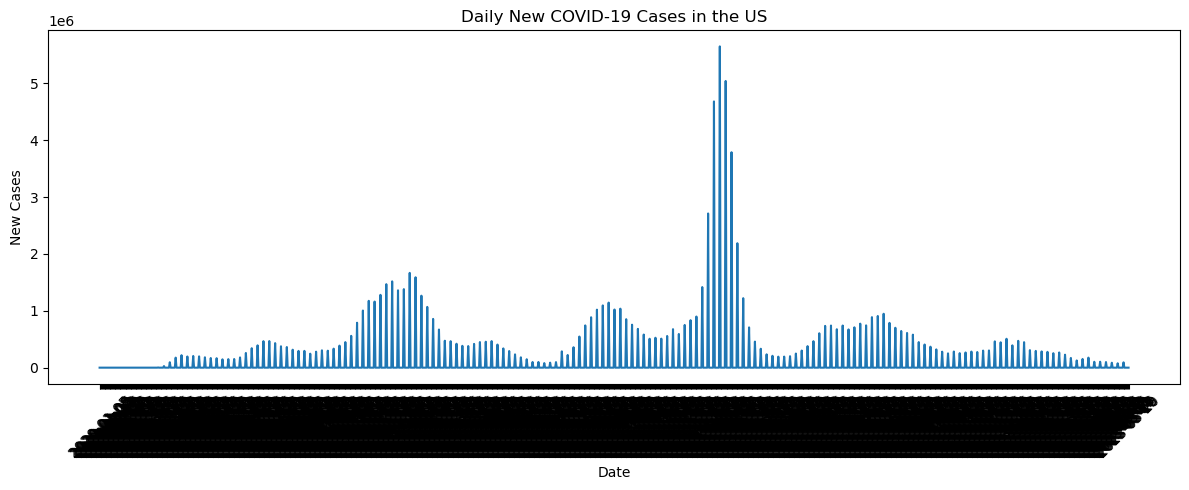

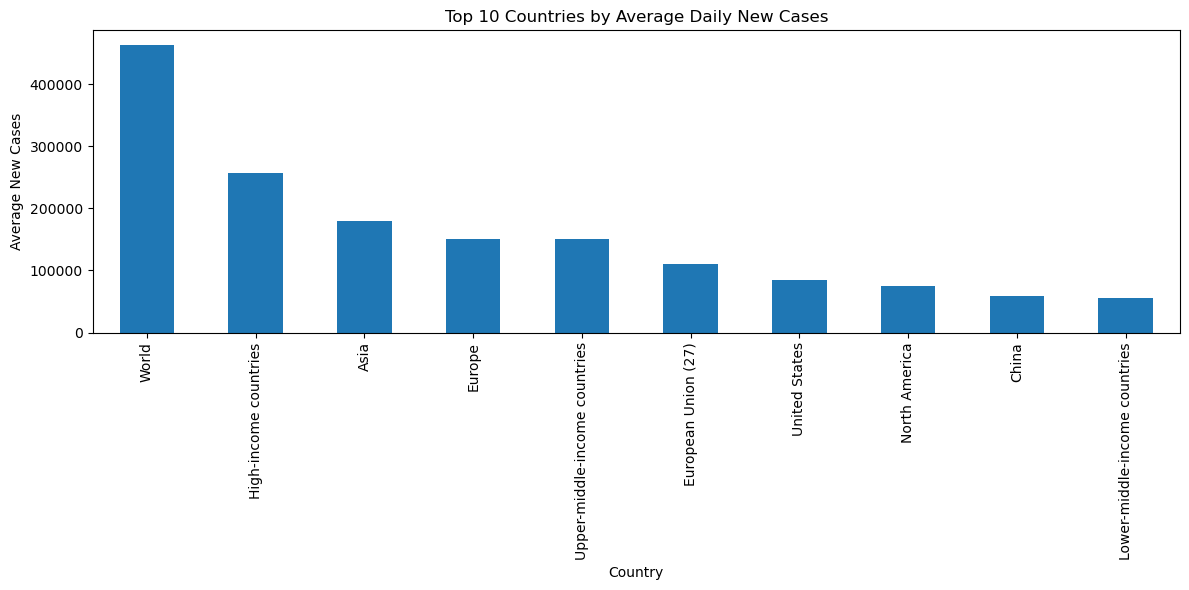

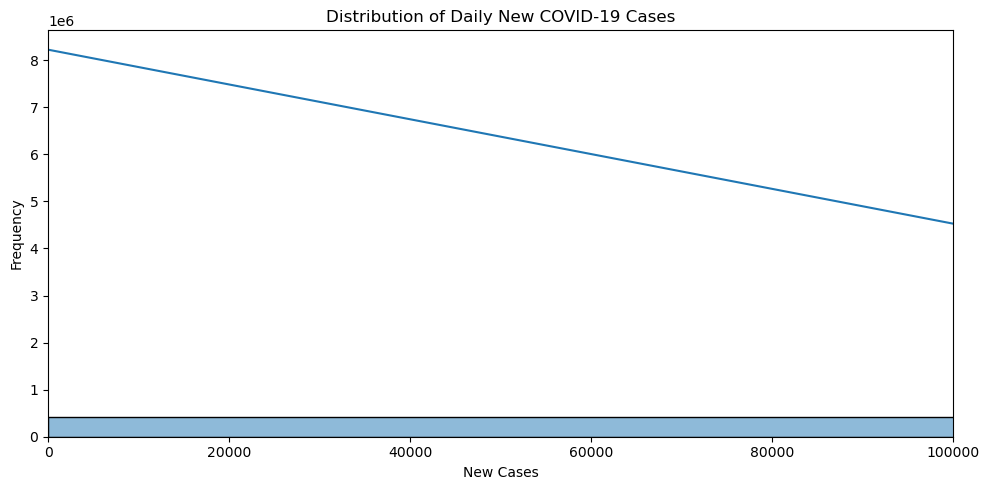

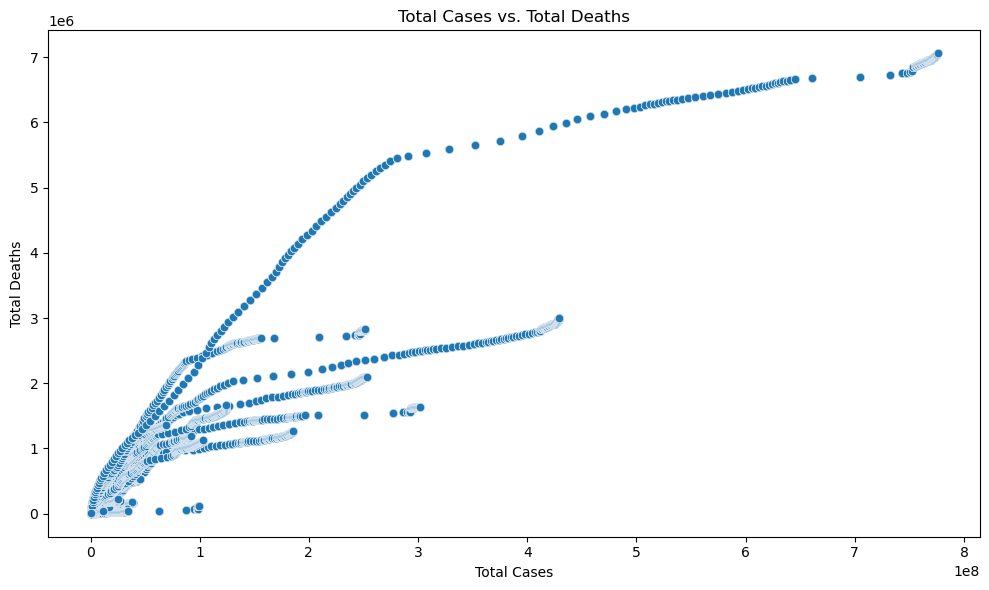

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: daily new cases for United States
us = df_clean[df_clean["location"] == "United States"]
plt.figure(figsize=(12, 5))
sns.lineplot(x="date", y="new_cases", data=us)
plt.title("Daily New COVID-19 Cases in the US")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()

# Bar chart: average new cases per country (top 10)
plt.figure(figsize=(12, 6))
grouped.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Average Daily New Cases")
plt.xlabel("Country")
plt.ylabel("Average New Cases")
plt.tight_layout()
plt.show()

# Histogram: distribution of new cases
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["new_cases"], bins=50, kde=True)
plt.title("Distribution of Daily New COVID-19 Cases")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.xlim(0, 100000)  # limit outliers
plt.tight_layout()
plt.show()

# Scatter plot: total cases vs. total deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_cases", y="total_deaths", data=df_clean, alpha=0.5)
plt.title("Total Cases vs. Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()
